# Fit a Polynomial

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style("whitegrid")

In [2]:
dates = pd.read_excel("./data/electricityData.xlsx", sheet_name="dates", header=None, converters={0: pd.to_datetime})
usage = pd.read_excel("./data/electricityData.xlsx", sheet_name="usage", header=None)
residential = usage.iloc[:, 0]

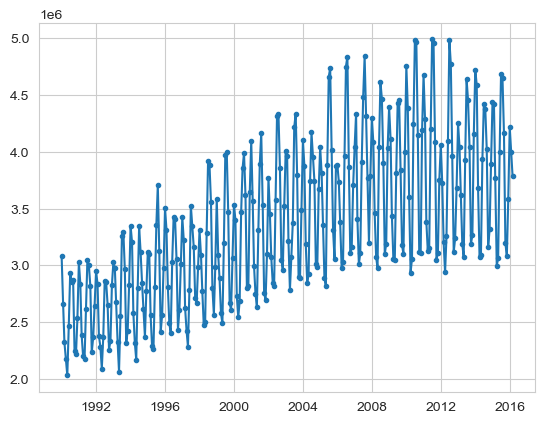

In [3]:
plt.figure()
plt.plot(dates, residential, marker='.')
plt.show()

The DataFrame dates contains the months for which the electricity usage is recorded. To perform polynomial fitting, we must first convert the dates to elapsed times. We can perform arithmetic operations on dates.

In [4]:
t = (dates - dates.iloc[0]).squeeze()
t

0        0 days
1       31 days
2       59 days
3       90 days
4      120 days
         ...   
310   9435 days
311   9465 days
312   9496 days
313   9527 days
314   9556 days
Name: 0, Length: 315, dtype: timedelta64[ns]

In [5]:
t_mean, t_std = t.dt.days.mean(), t.dt.days.std()
c = np.polyfit((t.dt.days - t_mean) / t_std, residential, 3)
c

array([ -77148.98621488, -108822.98486724,  590365.02019837,
       3465456.61133737])

In [6]:
residential_fit = np.polyval(c, (t.dt.days - t_mean) / t_std)

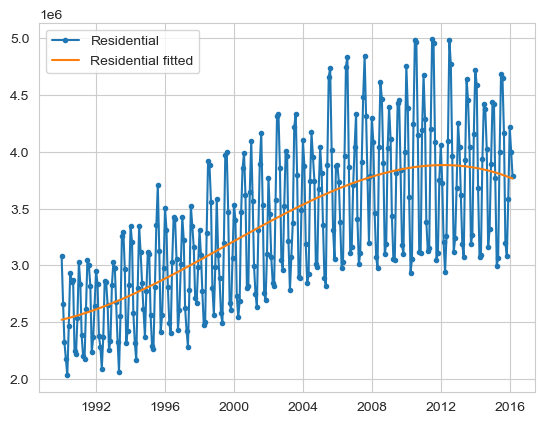

In [7]:
plt.figure()
plt.plot(dates, residential, marker='.')
plt.plot(dates, residential_fit)
plt.legend(["Residential", "Residential fitted"])
plt.show()